A) Set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.    

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Below Loading the data with read_csv
diabetes_data = pd.read_csv("diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample data of 25 observations from loaded csv file "diabetes.csv"
sample = diabetes_data.sample(n=25)

# Calculate mean and highest glucose values for random sample data and population of people
sample_mean_glucose = round(sample['Glucose'].mean(),2)
#Printing the Mean values of random Sample data
print("Mean of Glucose Value for Sample: ",sample_mean_glucose)

sample_highest_glucose = sample['Glucose'].max()
#Printing the Maximum value of random Sample data
print("Highest of Glucose Value for Sample: ",sample_highest_glucose)

population_mean_glucose = round(diabetes_data['Glucose'].mean(),2)
#Printing the Mean values of loaded csv data
print("Mean of Glucose Value for Population: ",population_mean_glucose)

population_highest_glucose = diabetes_data['Glucose'].max()
#Printing the Maximum value of loaded csv data
print("Highest of Glucose Value for Population: ",population_highest_glucose)

Mean of Glucose Value for Sample:  116.64
Highest of Glucose Value for Sample:  183
Mean of Glucose Value for Population:  120.89
Highest of Glucose Value for Population:  199


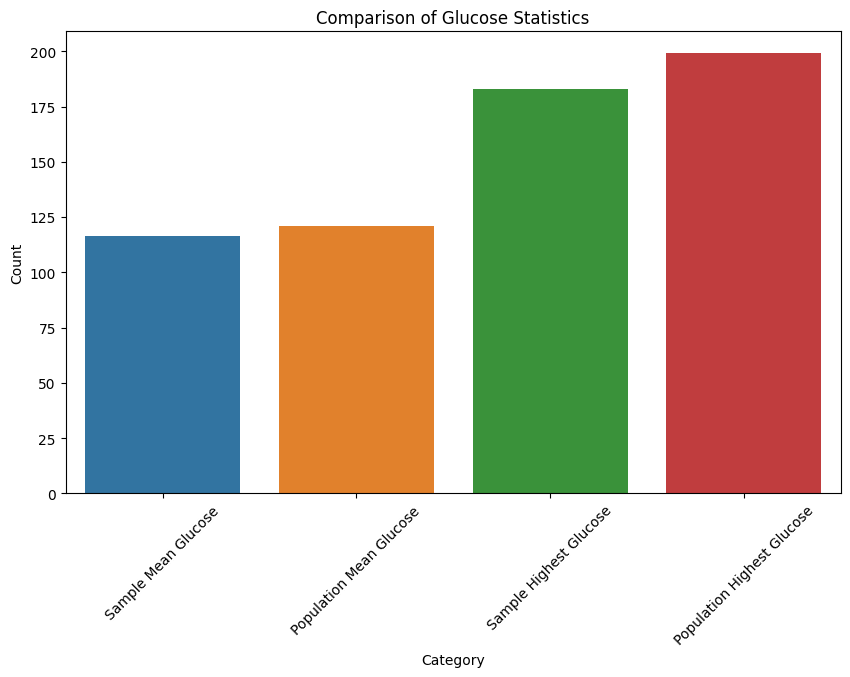

In [14]:
#Compare the statistics using barplot
categories = ['Sample Mean Glucose', 'Population Mean Glucose', 'Sample Highest Glucose', 'Population Highest Glucose']
counts = [sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose]

# Create a DataFrame from the data
df = pd.DataFrame({'Category': categories, 'Count': counts})

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df, hue=df['Category'], legend=False)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

In [37]:
# Find the 98th percentile of BMI for random sample data
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:",round(sample_98th_percentile_bmi,2))
# Find the 98th percentile of BMI for loaded csv data
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
print("Population 98th percentile BMI:",round(population_98th_percentile_bmi,2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


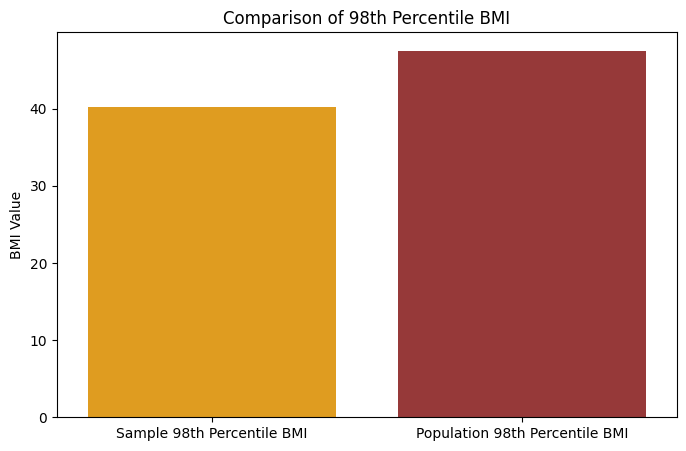

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            y=[sample_98th_percentile_bmi, population_98th_percentile_bmi],
            hue=['Sample', 'Population'], legend=False,
            palette=['orange', 'brown'],
            dodge=False)
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.show()

(C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable.

In [50]:
# Function to calculate statistics from bootstrap samples

def bootstrap_statistics(data, n_bootstrap_samples=500, sample_size=150):
    bs_means = []
    bs_stds = []
    bs_percentiles = []

    for _ in range(n_bootstrap_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        bs_means.append(np.mean(bootstrap_sample['BloodPressure']))
        bs_stds.append(np.std(bootstrap_sample['BloodPressure']))
        bs_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Using median instead of percentile

    return bs_means, bs_stds, bs_percentiles

# Calculate bootstrap statistics
bs_means, bs_stds, bs_percentiles = bootstrap_statistics(diabetes_data)

# Calculate population statistics
#finding Mean for loaded csv data
population_mean_blood_pressure = np.mean(diabetes_data['BloodPressure'])
print("Population Mean BP:", round(population_mean_blood_pressure, 2))
#finding standard deviation for loaded csv data
population_std_blood_pressure = np.std(diabetes_data['BloodPressure'])
print("Population Standard BP:", round(population_std_blood_pressure, 2))
#finding percentile for loaded csv data
population_percentile_blood_pressure = np.percentile(diabetes_data['BloodPressure'], 50)
print("Population Percentile BP:", round(population_percentile_blood_pressure, 2))


Population Mean BP: 69.11
Population Standard BP: 19.34
Population Percentile BP: 72.0


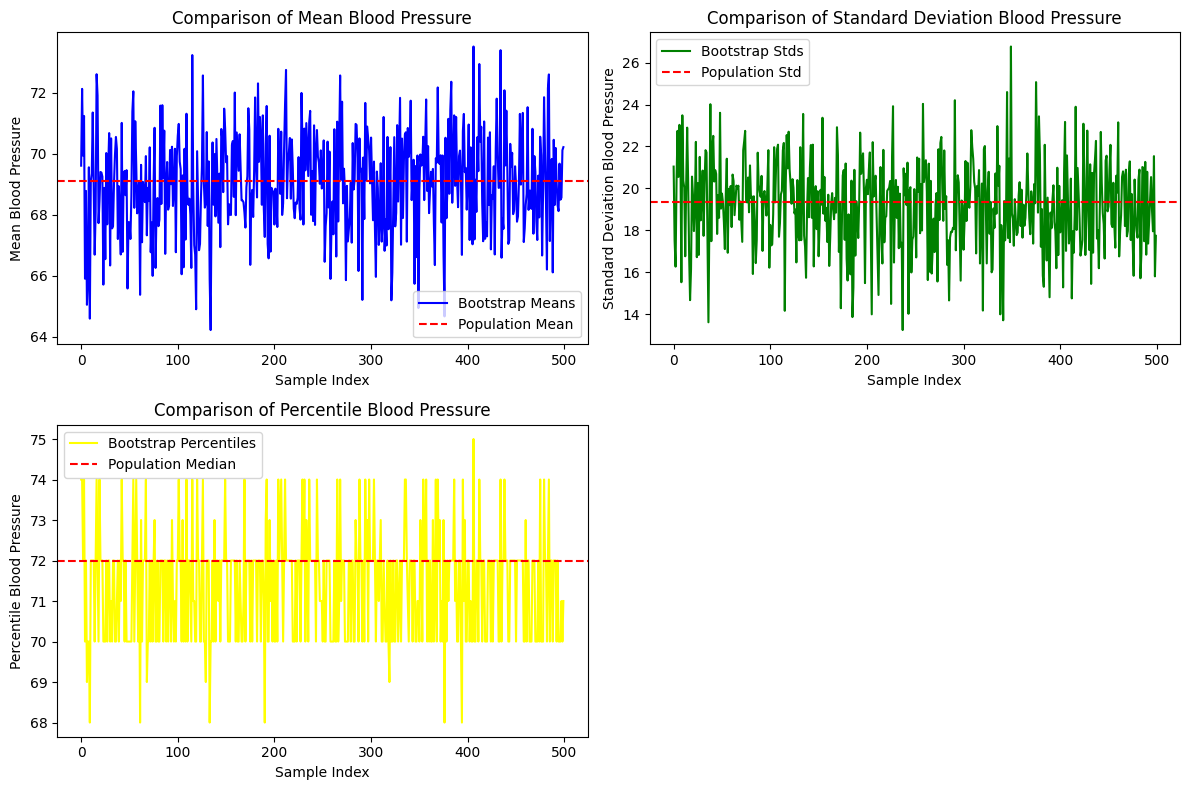

In [52]:
# Compare statistics using charts

plt.figure(figsize=(12, 8))

# Plot mean comparison
plt.subplot(2, 2, 1)
sns.lineplot(x=range(len(bs_means)), y=bs_means, color='blue', label='Bootstrap Means')
plt.axhline(population_mean_blood_pressure, color='red', linestyle='--', label='Population Mean')
plt.title('Comparison of Mean Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Mean Blood Pressure')
plt.legend()

# Plot standard deviation comparison
plt.subplot(2, 2, 2)
sns.lineplot(x=range(len(bs_stds)), y=bs_stds, color='green', label='Bootstrap Stds')
plt.axhline(population_std_blood_pressure, color='red', linestyle='--', label='Population Std')
plt.title('Comparison of Standard Deviation Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Standard Deviation Blood Pressure')
plt.legend()

# Plot percentile comparison
plt.subplot(2, 2, 3)
sns.lineplot(x=range(len(bs_percentiles)), y=bs_percentiles, color='yellow', label='Bootstrap Percentiles')
plt.axhline(population_percentile_blood_pressure, color='red', linestyle='--', label='Population Median')
plt.title('Comparison of Percentile Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Percentile Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()


Findings:

1. **Glucose Statistics:**

   The sample's highest glucose value is lower than the population's, and the sample's mean glucose value is marginally lower than the population's. This implies that, in comparison to the population, the sample may have fewer extremely high glucose results and a somewhat lower average glucose level. This suggests that the sample may have a slightly lower average glucose level and fewer extreme high glucose values compared to the population.

2. **BMI Statistics:**

   The sample's BMI, which is in the 98th percentile, is significantly lower than the population's. This suggests that, in comparison to the population, fewer people in the sample have abnormally high BMI values.


3. **Blood Pressure (BP) Statistics:**

   Because of the nature of bootstrapping, blood pressure mean and standard deviation for the samples should be quite near to population values. Nonetheless, the bootstrap samples' median blood pressure, or 50th percentile, would probably likewise be close to the population average.


In conclusion, there are variations in BMI percentiles but overall, the sample shows trends in blood pressure and glucose data that are comparable to those of the population. The observed discrepancies can result from sample random variation or possible discrepancies between the sample and the population.
